# Regressão - Steam store games

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Normalization
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
import sklearn.tree as SKTree
from sklearn.metrics import accuracy_score

In [3]:
# Datasets
df_steam = pd.read_csv("data/steam/steam.csv")
df_support = pd.read_csv("data/steam/steam_support_info.csv")
df_description = pd.read_csv("data/steam/steam_description_data.csv")
df_requirements = pd.read_csv("data/steam/steam_requirements_data.csv")
df_tags = pd.read_csv("data/steam/steamspy_tag_data.csv")

## Análise Exploratoria / Pré-processamento

### Visualização inicial dos arquivos presentes no dataset

In [4]:
# Esse conjunto de dados contém as descrições de cada jogo, essas informações não serão relevantes para a predição dos valores
df_description.head(5)

,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


In [5]:
# Esse conjunto de dados contém as informações dos requerimentos minimos e maximos para rodar os jogos em cada plataforma, essas informações não serão relevantes para a predição dos valores
df_requirements.head(5)

,steam_appid,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,10,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
1,20,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
2,30,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
3,40,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
4,50,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN


In [6]:
df_tags.head()

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploração e tratamento dos valores em df_steam

#### Visualização inicial dos dados

In [7]:
df_steam.head(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99


In [8]:
df_steam.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [9]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [10]:
# Identificando o tamanho do dataset
df_steam.shape

(27075, 18)

In [11]:
# Análise de valores duplicados
df_steam.duplicated().sum()

np.int64(0)

In [12]:
# Localização de valores nulos
df_steam.isnull().sum()

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

#### Criação de coluna do ano de lançamento

In [13]:
df_steam['release_date'].value_counts()

release_date
2018-07-13    64
2018-11-16    56
2016-04-05    56
2019-01-31    56
2018-05-31    55
              ..
2019-04-26     1
2008-11-17     1
2006-06-01     1
2006-05-01     1
2005-10-27     1
Name: count, Length: 2619, dtype: int64

In [14]:
# Alterando os valores das datas e colocando somento o ano de lançamento
df_steam['release_date'] = pd.to_datetime(df_steam['release_date'])
df_steam['release_year'] = df_steam['release_date'].dt.year

In [15]:
# Exclusão da coluna original
df_steam.drop('release_date', axis=1, inplace=True)

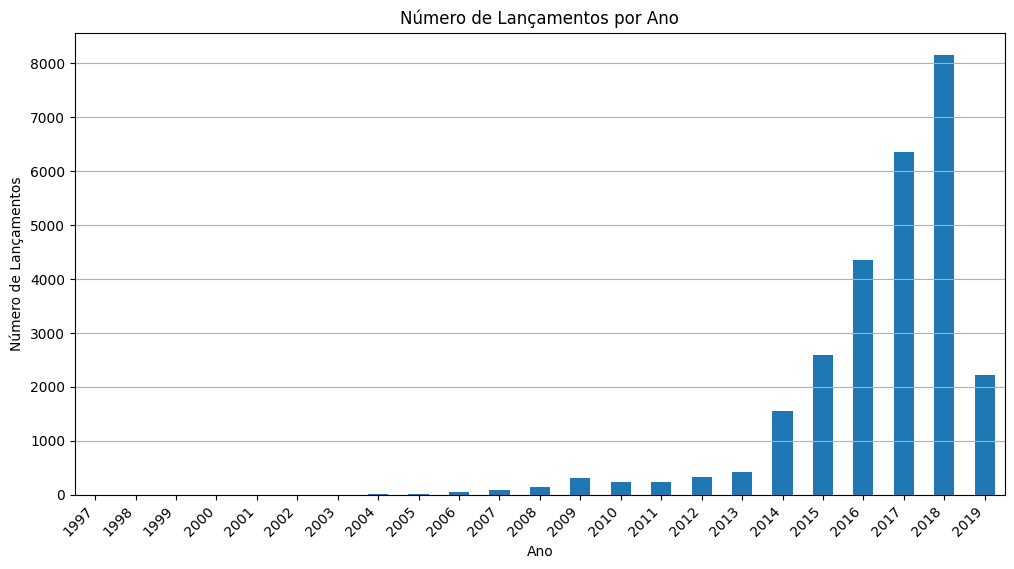

In [16]:
# Visualização da quantidade de jogos lançados em todos os anos que o dataset possue informações

# Contar o número de lançamentos por ano
launches_per_year = df_steam['release_year'].value_counts().sort_index()

# Plotar
plt.figure(figsize=(12, 6))
launches_per_year.plot(kind='bar')
plt.grid(axis='y')
plt.title('Número de Lançamentos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Lançamentos')
plt.xticks(rotation=45, ha='right') 
plt.show()

#### One Hot Encoding com os valores de plataforma

In [17]:
df_steam['platforms'].value_counts()

platforms
windows              18398
windows;mac;linux     4623
windows;mac           3439
windows;linux          610
mac                      3
mac;linux                1
linux                    1
Name: count, dtype: int64

In [18]:
# Separando as plataformas e aplicando o one-hot encoding no df_merged
df_expanded = df_steam['platforms'].str.get_dummies(sep=';')
df_steam = pd.concat([df_steam, df_expanded], axis=1)

In [19]:
# Exclusão da coluna original
df_steam.drop('platforms', axis=1, inplace=True)

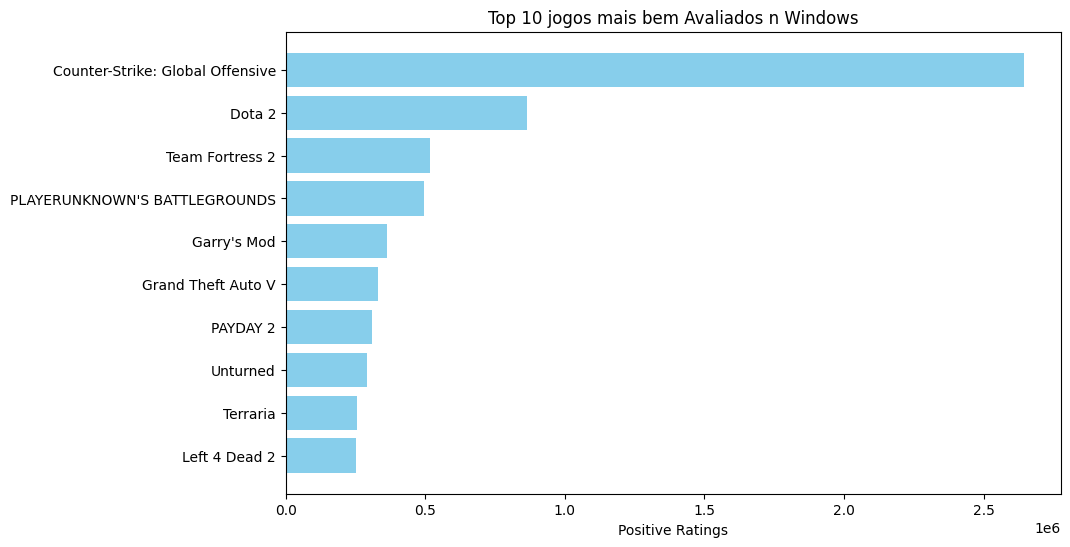

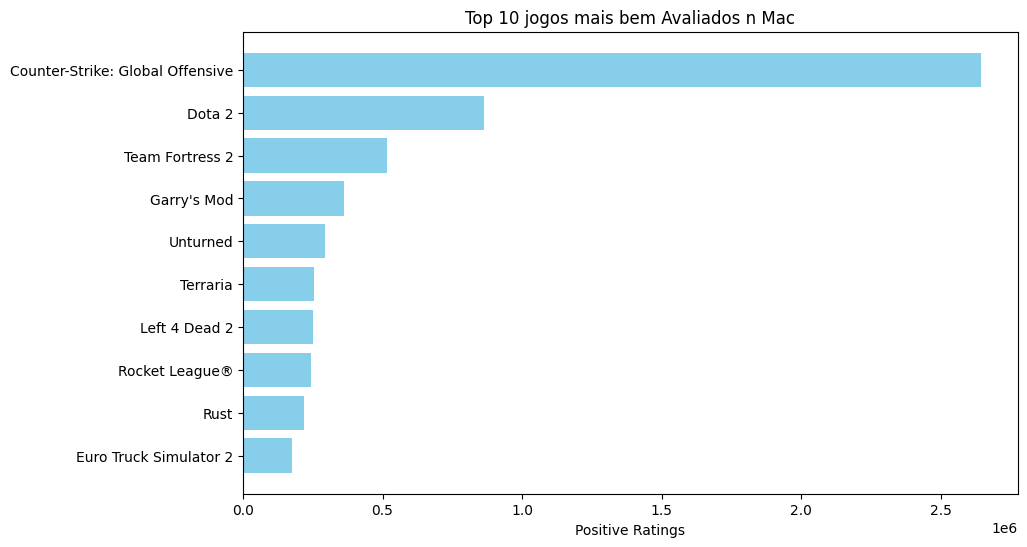

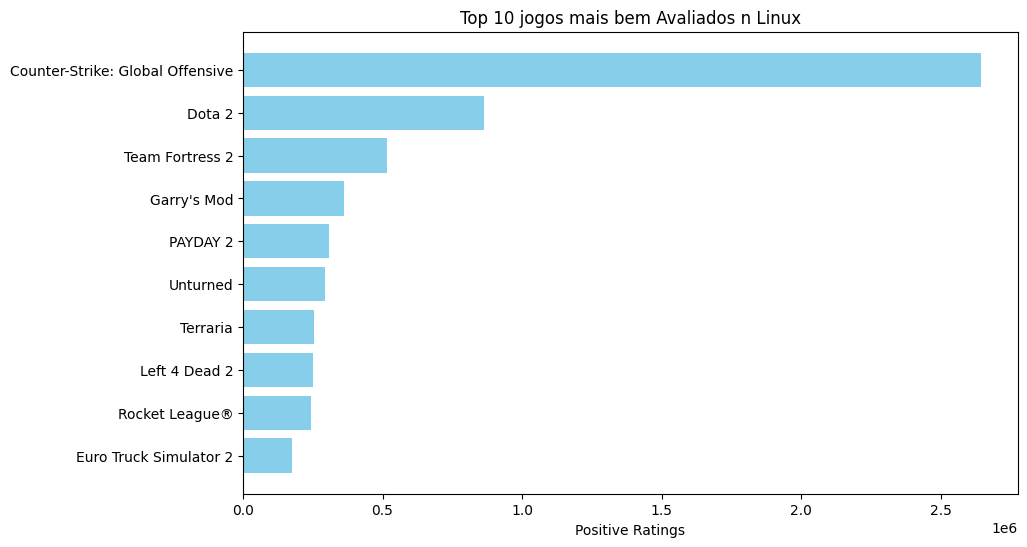

In [20]:
# Visualização dos jogos mais bem avaliados para cada plataforma
plataformas = ['windows', 'mac', 'linux']

# Criação do gráfico
for platforma in plataformas:
    # Filtro dos jogos disponíveis para cada plataforma por ordem de mais bem avaliados
    top_games = df_steam[df_steam[platforma] == 1].nlargest(10, 'positive_ratings')[['name', 'positive_ratings']]
    
    # Plotar do gráfico
    plt.figure(figsize=(10, 6))
    plt.barh(top_games['name'], top_games['positive_ratings'], color='skyblue')
    plt.xlabel('Positive Ratings')
    plt.title(f'Top 10 jogos mais bem Avaliados n {platforma.capitalize()}')
    plt.gca().invert_yaxis()
    plt.show()

In [21]:
# Contagem de jogos por plataforma
plataformas = ['windows', 'mac', 'linux']

# Criação do gráfico
for platforma in plataformas:
    print(df_steam[platforma].value_counts())
    print()

windows
1    27070
0        5
Name: count, dtype: int64

mac
0    19009
1     8066
Name: count, dtype: int64

linux
0    21840
1     5235
Name: count, dtype: int64



#### Média da quantidade de donos

In [22]:
# Visualização das informações na coluna owners
df_steam['owners'].value_counts()

owners
0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: count, dtype: int64

In [23]:
# Divisão da coluna owners em duas colunas temporárias
df_steam[['min', 'max']] = df_steam['owners'].str.split('-', expand=True).astype(int)

In [24]:
# Calculo da média das novas colunas
df_steam['owners_avg'] = ((df_steam['min'] + df_steam['max']) / 2).astype(int)

In [25]:
# Drop das colunas temporárias e da coluna original
df_steam.drop(columns=['min', 'max', 'owners'], inplace=True)

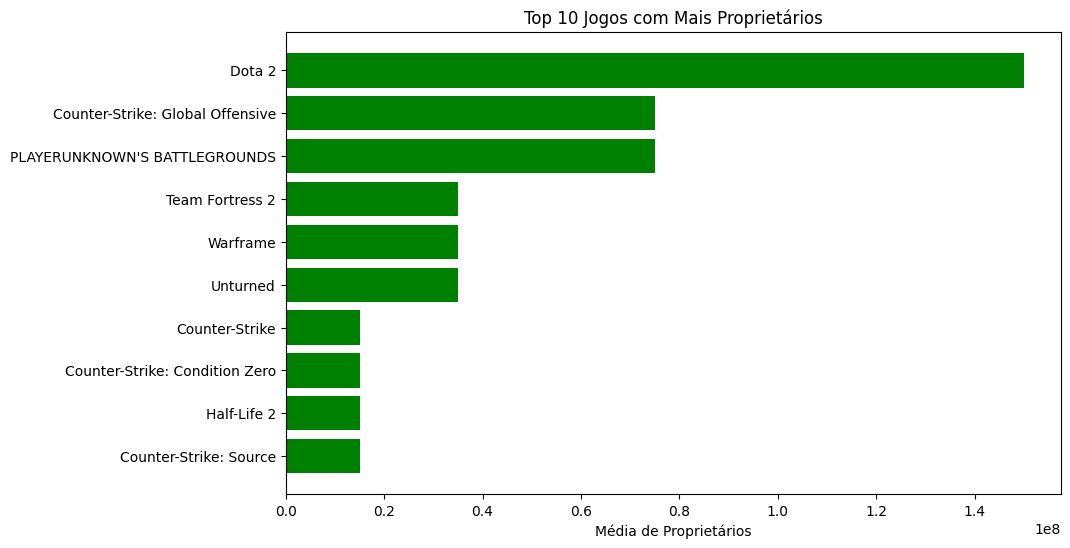

In [26]:
top_games = df_steam.nlargest(10, 'owners_avg')[['name', 'owners_avg']]
plt.figure(figsize=(10, 6))
plt.barh(top_games['name'], top_games['owners_avg'], color='green')
plt.xlabel('Média de Proprietários')
plt.title('Top 10 Jogos com Mais Proprietários')
plt.gca().invert_yaxis()
plt.show()

In [27]:
df_steam['owners_avg'].value_counts()

owners_avg
10000        18596
35000         3059
75000         1695
150000        1386
350000        1272
750000         513
1500000        288
3500000        193
7500000         46
15000000        21
35000000         3
75000000         2
150000000        1
Name: count, dtype: int64

#### Redução da quantidade de valores presentes na coluna genres

In [28]:
df_steam["genres"].value_counts()

genres
Action;Indie                                                        1852
Casual;Indie                                                        1482
Action;Adventure;Indie                                              1229
Adventure;Indie                                                     1170
Action;Casual;Indie                                                 1004
                                                                    ... 
Casual;Free to Play;Indie;Racing;Strategy                              1
Free to Play;Indie;RPG;Early Access                                    1
Action;Adventure;Indie;Massively Multiplayer;Simulation;Strategy       1
Indie;Massively Multiplayer;Racing;Simulation                          1
Action;Adventure;Indie;Racing;RPG                                      1
Name: count, Length: 1552, dtype: int64

In [29]:
# Dividindo as informações na colune genres e apenas considerando as duas primeiras palavras para casos que pssuam mais de dois generos
split_genres = df_steam["genres"].str.split(";", n=2, expand=True)
df_steam["genres"] = split_genres[0]

In [30]:
# Obter os valores únicos da coluna 'genres'
unique_genres = df_steam['genres'].unique()

# Gerar o mapeamento automático usando enumerate para atribuir um número único a cada gênero
genre_mapping = {genre: idx for idx, genre in enumerate(unique_genres, start=1)}

# Aplicar o mapeamento à coluna 'genres'
df_steam['genres_numeric'] = df_steam['genres'].map(genre_mapping)

In [31]:
# Visualização do resultado obtido
# Obter as contagens para 'genres' e 'genres_numeric'
genres_counts = df_steam['genres'].value_counts()
genres_numeric_counts = df_steam['genres_numeric'].value_counts()

# Criar um DataFrame para combinar os dados de 'genres' e 'genres_numeric'
genres_mapping_df = pd.DataFrame({
    'genres': genres_counts.index,
    'genres_numeric': genres_counts.index.map(lambda x: genres_numeric_counts[genre_mapping[x]] if genre_mapping[x] in genres_numeric_counts.index else None)
})

# Exibir a tabela resultante
genres_mapping_df

,genres,genres_numeric
0,Action,11212
1,Adventure,5256
2,Casual,4373
3,Indie,2623
4,Violent,709
5,Simulation,631
6,Strategy,532
7,RPG,407
8,Free to Play,395
9,Sexual Content,245


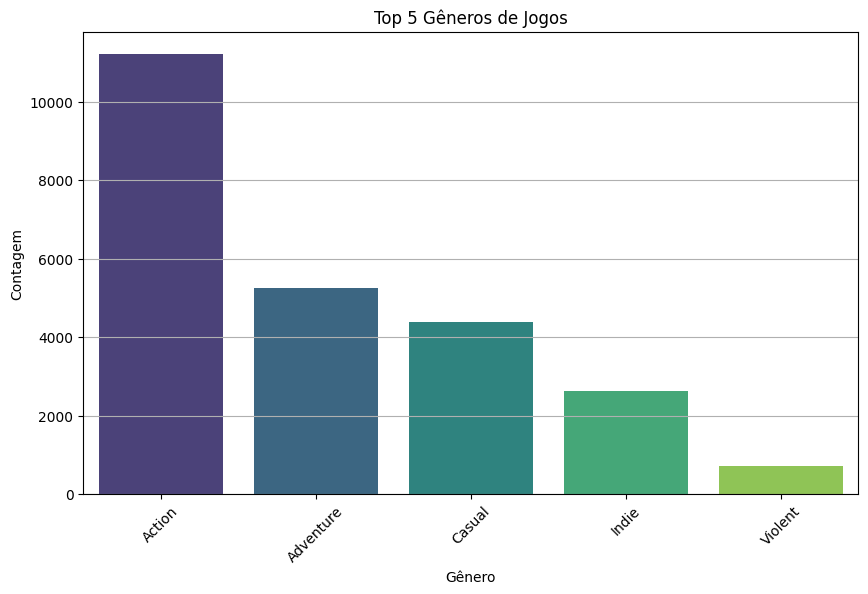

In [32]:
# Obter os 5 gêneros mais comuns no df_steam
top_genres = df_steam['genres'].value_counts().head(5)

# Plotar os 5 gêneros mais comuns
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
plt.title('Top 5 Gêneros de Jogos')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Redução da quantidade de valores presentes na coluna categories

In [33]:
df_steam['categories'].value_counts()

categories
Single-player                                                                                                           6110
Single-player;Steam Achievements                                                                                        2334
Single-player;Steam Achievements;Steam Trading Cards                                                                     848
Single-player;Partial Controller Support                                                                                 804
Single-player;Steam Trading Cards                                                                                        792
                                                                                                                        ... 
Online Multi-Player;Cross-Platform Multiplayer;Steam Achievements;Steam Workshop;Stats;Includes level editor               1
Online Multi-Player;Steam Achievements;Stats                                                                      

In [34]:
df_steam['categories'] = df_steam['categories'].apply(
    lambda x: 'Multi-player' if 'Multi-player' in x else 'Single-player'
)

In [35]:
# Exibir a contagem de valores na nova coluna
df_steam['categories'].value_counts()

categories
Single-player    23101
Multi-player      3974
Name: count, dtype: int64

In [36]:
# Criar as colunas binárias 'is_multi_player' e 'is_single_player'
df_steam['is_multi_player'] = df_steam['categories'].apply(lambda x: 1 if x == 'Multi-player' else 0)
df_steam['is_single_player'] = df_steam['categories'].apply(lambda x: 1 if x == 'Single-player' else 0)

In [37]:
# Exibir o DataFrame atualizado
df_steam[['categories', 'is_multi_player', 'is_single_player']].head()

,categories,is_multi_player,is_single_player
0,Multi-player,1,0
1,Multi-player,1,0
2,Multi-player,1,0
3,Multi-player,1,0
4,Multi-player,1,0


In [38]:
df_steam.drop(columns=['categories'], inplace=True)

#### B

In [39]:
df_steam['required_age'].value_counts()

required_age
0     26479
18      308
16      192
12       73
7        12
3        11
Name: count, dtype: int64

In [40]:
df_steam['achievements'].value_counts()

achievements
0       11864
10        679
12        618
20        574
15        490
        ...  
196         1
4981        1
3340        1
574         1
510         1
Name: count, Length: 410, dtype: int64

In [41]:
df_steam['developer'].value_counts()

developer
Choice of Games                    94
KOEI TECMO GAMES CO., LTD.         72
Ripknot Systems                    62
Laush Dmitriy Sergeevich           51
Nikita "Ghost_RUS"                 50
                                   ..
Black Element                       1
Neversoft                           1
Mark Healey                         1
Valve;Hidden Path Entertainment     1
Adept Studios GD                    1
Name: count, Length: 17112, dtype: int64

In [42]:
df_steam['publisher'].value_counts()

publisher
Big Fish Games      212
Strategy First      136
Ubisoft             111
THQ Nordic           98
Square Enix          97
                   ... 
LikeVR                1
Suspicious Ducks      1
Kaleido, Inc.         1
Dedbat Studios        1
the original air      1
Name: count, Length: 14353, dtype: int64

### Exploração dos valores em df_support

In [43]:
# Esse conjunto de dados contém informações se os jogos possuem suporte de seus desenvolvedores
df_support.head()

,steam_appid,website,support_url,support_email
0,10,NaN,http://steamcommunity.com/app/10,NaN
1,30,http://www.dayofdefeat.com/,NaN,NaN
2,50,NaN,https://help.steampowered.com,NaN
3,70,http://www.half-life.com/,http://steamcommunity.com/app/70,NaN
4,80,NaN,http://steamcommunity.com/app/80,NaN


In [44]:
df_support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27136 entries, 0 to 27135
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   steam_appid    27136 non-null  int64 
 1   website        18015 non-null  object
 2   support_url    16479 non-null  object
 3   support_email  23500 non-null  object
dtypes: int64(1), object(3)
memory usage: 848.1+ KB


In [45]:
# Transoformação das informações presentes nas três colunas principais em uma só, se possui suporte ou não
df_support['support'] = df_support[['website', 'support_url', 'support_email']].notnull().any(axis=1).astype(int)

In [46]:
# Excluindo as outras colunas
df_support.drop(['website','support_url', 'support_email'], axis=1, inplace=True)

In [47]:
df_support.head()

,steam_appid,support
0,10,1
1,30,1
2,50,1
3,70,1
4,80,1


### Exploração dos valores em df_tags

In [48]:
# Esse conjunto de dados possui as calassificações que os jogadores fizeram para cada jogo
df_tags.head()

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_tags.shape

(29022, 372)

In [50]:
list(df_tags.columns)

['appid',
 '1980s',
 '1990s',
 '2.5d',
 '2d',
 '2d_fighter',
 '360_video',
 '3d',
 '3d_platformer',
 '3d_vision',
 '4_player_local',
 '4x',
 '6dof',
 'atv',
 'abstract',
 'action',
 'action_rpg',
 'action_adventure',
 'addictive',
 'adventure',
 'agriculture',
 'aliens',
 'alternate_history',
 'america',
 'animation_&_modeling',
 'anime',
 'arcade',
 'arena_shooter',
 'artificial_intelligence',
 'assassin',
 'asynchronous_multiplayer',
 'atmospheric',
 'audio_production',
 'bmx',
 'base_building',
 'baseball',
 'based_on_a_novel',
 'basketball',
 'batman',
 'battle_royale',
 'beat_em_up',
 'beautiful',
 'benchmark',
 'bikes',
 'blood',
 'board_game',
 'bowling',
 'building',
 'bullet_hell',
 'bullet_time',
 'crpg',
 'capitalism',
 'card_game',
 'cartoon',
 'cartoony',
 'casual',
 'cats',
 'character_action_game',
 'character_customization',
 'chess',
 'choices_matter',
 'choose_your_own_adventure',
 'cinematic',
 'city_builder',
 'class_based',
 'classic',
 'clicker',
 'co_op',
 'co_op

Esse conjunto de dados possui diversas informações aleatorias em que os proprios jogadores dão aos jogos. Esses valores irão afetar o treinamento dos modelos de forma negativa

### Junnção dos diferentes datasets

In [51]:
# Junção dos dataset em um só
df_merged = pd.merge(df_steam, df_support, left_on='appid', right_on='steam_appid', how='left')

In [52]:
# Exclusão das colunas que não serão mais utilizadas
df_merged = df_merged.drop(['appid', 'steamspy_tags', 'steam_appid'], axis = 1)

In [53]:
# Quando essa coluna é exportada para um novo dataset, ela apresenta valores nulos
df_merged['support'] = df_merged['support'].fillna(0).astype(int)

In [54]:
df_merged.head()

,name,english,developer,publisher,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,...,price,release_year,linux,mac,windows,owners_avg,genres_numeric,is_multi_player,is_single_player,support
0,Counter-Strike,1,Valve,Valve,0,Action,0,124534,3339,17612,...,7.19,2000,1,1,1,15000000,1,1,0,1
1,Team Fortress Classic,1,Valve,Valve,0,Action,0,3318,633,277,...,3.99,1999,1,1,1,7500000,1,1,0,0
2,Day of Defeat,1,Valve,Valve,0,Action,0,3416,398,187,...,3.99,2003,1,1,1,7500000,1,1,0,1
3,Deathmatch Classic,1,Valve,Valve,0,Action,0,1273,267,258,...,3.99,2001,1,1,1,7500000,1,1,0,0
4,Half-Life: Opposing Force,1,Gearbox Software,Valve,0,Action,0,5250,288,624,...,3.99,1999,1,1,1,7500000,1,1,0,1


### Corelação entre os valores

In [55]:
#Colunas numéricas
numeric_cols = ['required_age', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners_avg',
                'price', 'support', 'release_year', 'linux', 'mac', 'windows', 'is_multi_player', 'is_single_player', 'genres_numeric', 'english']

In [56]:
# Filtrando apenas as colunas numéricas no dataframe
df_numeric = df_merged[numeric_cols]

In [57]:
# Gerar a matriz de correlação
corr_matrix = df_numeric.corr()

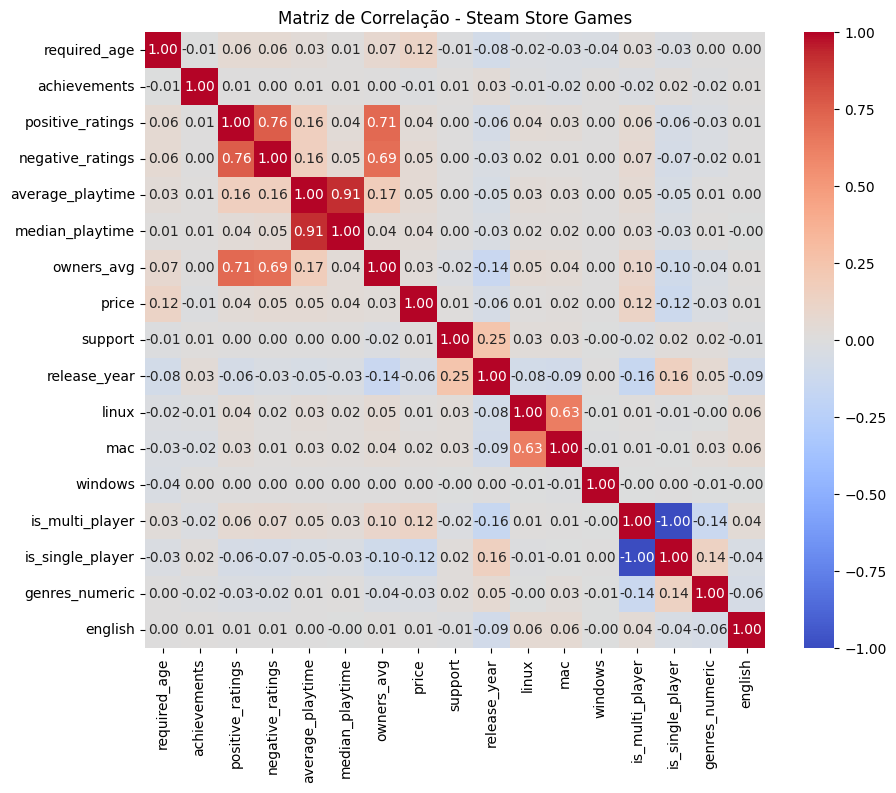

In [58]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação - Steam Store Games')
plt.show()

## Modelos de Regressão

### Gráficos auxiliares

In [59]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)

### Regressão Linear

In [60]:
# Seleção dos dados a serem utilizados nesse processo

X = df_merged[['average_playtime', 'positive_ratings', 'negative_ratings', 'owners_avg', 'price', 'is_multi_player']]
y = df_merged['median_playtime']

In [61]:
# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Normalização dos dados
normalizer = Normalization()
normalizer.adapt(X_train.to_numpy())

In [63]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_predict = lr.predict(X_test)
y_predict

array([ -7.51098692,  88.20429666, 397.96417226, ..., -34.35686468,
       -27.12576536, -11.01713012])

In [64]:
model = keras.Sequential([normalizer, layers.Dense(1)])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (21660, 6)             │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [65]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [66]:
history = model.fit(X_train, y_train, epochs=50, validation_split = 0.2)

Epoch 1/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 141.1048 - val_loss: 116.4548
Epoch 2/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - loss: 112.3582 - val_loss: 114.5160
Epoch 3/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - loss: 102.1628 - val_loss: 113.2997
Epoch 4/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - loss: 107.0630 - val_loss: 112.2070
Epoch 5/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 118.7422 - val_loss: 111.1619
Epoch 6/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 120.0488 - val_loss: 110.1709
Epoch 7/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 123.5618 - val_loss: 109.1588
Epoch 8/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - loss: 103.8852 - val_loss: 108.0514
Epoch 9/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 102.6849 - val_loss: 106.9551
Epoch 10/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - loss: 114.2851 - val_loss: 105.8646
Epoch 11/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - loss: 108.8646 - val_loss: 104.

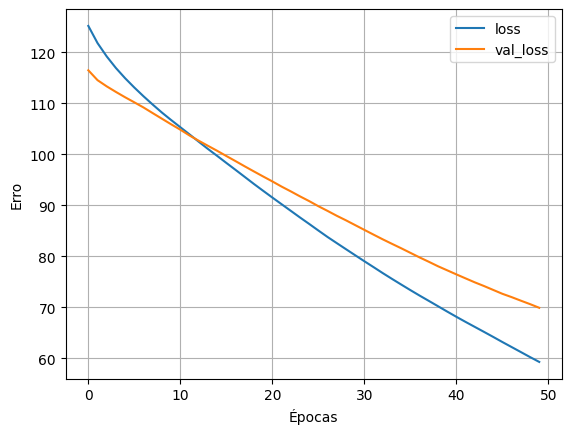

In [67]:
plot_loss(history)

In [68]:
# Avaliação do modelo
y_pred = model.predict(X_test)
print("MSE: " , mean_squared_error(y_test, y_pred))
print("R2: " , r2_score(y_test, y_pred))

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
MSE:  3641008.9587578247
R2:  0.7702697515487671


### Árvore de Decisão

In [69]:
# Seleção dos dados a serem utilizados nesse processo

X = df_merged[['average_playtime', 'positive_ratings', 'negative_ratings']]
y = df_merged['owners_avg']

In [70]:
# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
## Train / Test
history_mse_train = []
history_mse_test = []

In [72]:
for max_depth in range(1, 10):
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    history_mse_train.append(mean_squared_error(y_train, train_pred))
    history_mse_test.append(mean_squared_error(y_test, test_pred))

[Text(0.8518458549222798, 0.95, 'x[1] <= 689693.0\nsquared_error = 1814210996415.688\nsamples = 21660\nvalue = 134201.293'),
 Text(0.7367227979274611, 0.85, 'x[1] <= 63533.5\nsquared_error = 518461208055.965\nsamples = 21658\nvalue = 123824.915'),
 Text(0.7942843264248705, 0.8999999999999999, 'True  '),
 Text(0.522020725388601, 0.75, 'x[1] <= 5247.5\nsquared_error = 217133330342.162\nsamples = 21615\nvalue = 103784.409'),
 Text(0.3134715025906736, 0.65, 'x[1] <= 1335.5\nsquared_error = 41122899505.245\nsamples = 21094\nvalue = 58059.164'),
 Text(0.16580310880829016, 0.55, 'x[2] <= 74.5\nsquared_error = 7955478471.951\nsamples = 20182\nvalue = 37164.553'),
 Text(0.08290155440414508, 0.45, 'x[0] <= 0.5\nsquared_error = 2278169050.81\nsamples = 17786\nvalue = 20371.922'),
 Text(0.04145077720207254, 0.35, 'x[1] <= 105.5\nsquared_error = 508872958.824\nsamples = 15867\nvalue = 14524.485'),
 Text(0.02072538860103627, 0.25, 'x[2] <= 25.5\nsquared_error = 146860000.034\nsamples = 14449\nvalue 

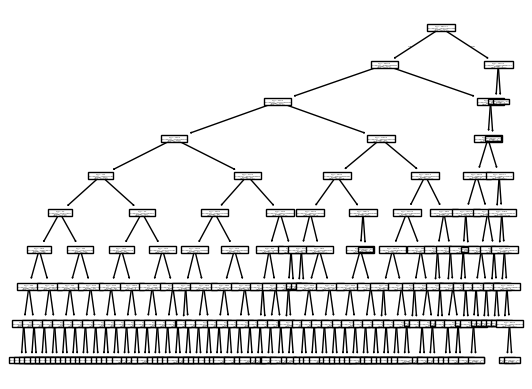

In [73]:
SKTree.plot_tree(model)

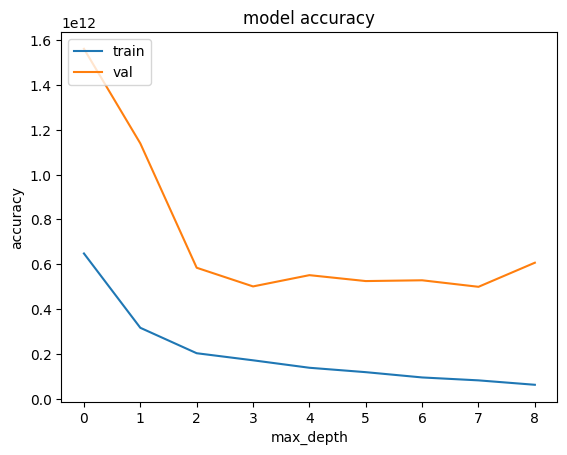

In [74]:
plt.plot(history_mse_train)
plt.plot(history_mse_test)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Redes Neurais

In [75]:
# Seleção dos dados a serem utilizados nesse processo

X = df_merged[['required_age','negative_ratings','is_multi_player']]
y = df_merged['price']

In [76]:
# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Normalizar os dados para melhor desempenho do modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
# Aleatorização dos dados
np.random.seed(1)

tf.random.set_seed(1)

In [79]:
model = keras.Sequential([
    normalizer,
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [80]:
# Rede Neural

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim = 3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [81]:
# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=42, validation_split=0.2, verbose=1)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 58.9161 - val_loss: 55.2862
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 49.0489 - val_loss: 54.0210
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.7314 - val_loss: 52.9736
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.4305 - val_loss: 51.2252
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47.8860 - val_loss: 49.3819
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47.3178 - val_loss: 47.7773
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46.9622 - val_loss: 47.4890
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46.8480 - val_loss: 47.4045
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46.7731 - val_loss: 47.3352
Epoch 10/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46.7348 - val_loss: 47.3252
Epoch 11/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46.6839 - val_loss: 47.3115
Epoch 12/50
413/413 ━━━━━━━━━━

In [82]:
# Avaliar o modelo
loss = model.evaluate(X_test_scaled, y_test)
print(f'Erro quadrático médio no conjunto de teste: {loss}')

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 118.0460
Erro quadrático médio no conjunto de teste: 99.06119537353516
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


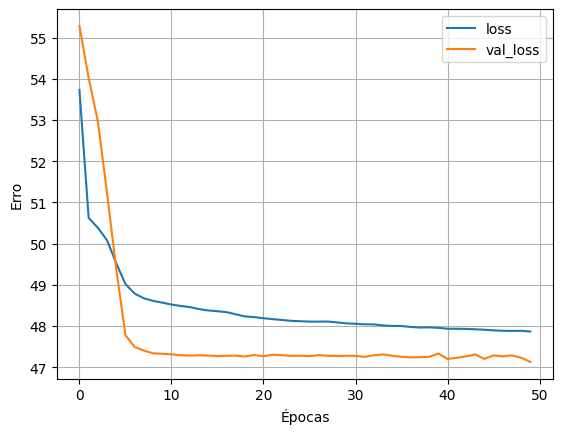

In [83]:
plot_loss(history)

In [84]:
y_test.mean()

np.float64(6.213588180978763)

In [85]:
y_pred.mean()

np.float32(5.585738)

In [86]:
# Avaliação do modelo
y_pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: " , mean_squared_error(y_test, y_pred))

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE:  6.281887301922065
MSE:  132.7766380789196
